In [2]:
# Import des paquets requis
import sys
sys.path.append('/opt/ros/noetic/lib/python3/dist-packages/')
sys.path.append('/usr/lib/python3/dist-packages')
from geometry_msgs.msg import Pose
import numpy as np
import math
import rosbag
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [3]:
# Boucle pour lire l'ensemble du ROSBAG et extraire seulement les positions x/y
X = []
Y = []
with rosbag.Bag("output_real.bag", 'r') as in_bag:
    for topic, msg, t in in_bag.read_messages():
        if topic=='/chassis_pose':
            X.append(msg.position.x) #Coordonnées X
            Y.append(msg.position.y) #Coordonnées Y

Référence pour utilisation de la méthode des moindres carrés : https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html

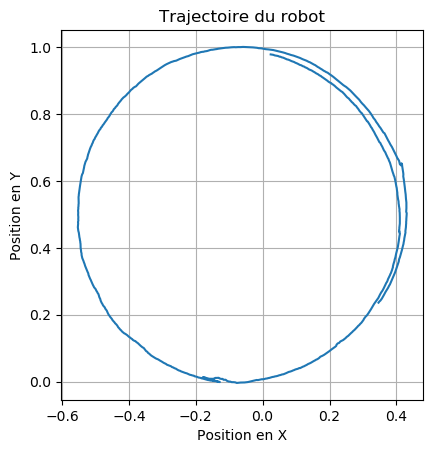

Centre du cercle : (-0.07039242467552427, 0.49917833397206984)
 
Rayon du cercle : 0.4915 et diamètre :0.9829
Périmètre : 3.0879


Variance sur le rayon : 0.000074
Moyenne sur le rayon : 0.491383


In [28]:
#----------------------------------------------#
# Tracé de la trajectoire
#----------------------------------------------#

#Tracé
plt.plot(X, Y)

#Affiche 
plt.title('Trajectoire du robot')
plt.xlabel('Position en X')
plt.ylabel('Position en Y')
plt.gca().set_aspect('equal', adjustable='box') #Repère orthonormé
plt.grid()
plt.show()

#----------------------------------------------#
# Approximation du cercle par la méthode des moindres carrés
#----------------------------------------------#

# Fonction à minimiser pour trouver le cercle
def fun(params, x, y):
    xc, yc, r = params
    return (x - xc) ** 2 + (y - yc) ** 2 - r ** 2

# Estimation initiale des paramètres du cercle
params0 = [np.mean(X), np.mean(Y), np.std(X)]

# Optimisation des paramètres
res = least_squares(fun, params0, args=(X, Y))

# Extraction des paramètres du cercle
center = (res.x[0], res.x[1])
radius = res.x[2]

#----------------------------------------------#
# Calcul de la variance sur le rayon du cercle
# Calculs basés sur la détermination du centre du
# cercle déterminée précédémment
#----------------------------------------------#

liste_rayon = []

#Calcul des rayons pour chaque coordonnées (X,Y)
for i in range(0, len(X)):
    liste_rayon.append(np.sqrt(math.pow(Y[i]-center[1],2)+math.pow(X[i]-center[0],2)))
var_rayon = np.var(liste_rayon)  #Variance
moy_rayon = np.mean(liste_rayon) #Moyenne

print(f"Centre du cercle : {center}\n ")
print(f"Rayon du cercle : {radius:.4f} et diamètre :{2*radius:.4f}")
print(f"Périmètre : {2*np.pi*radius:.4f}\n\n")

print("Variance sur le rayon : \033[31m{:.6f}\033[0m".format(var_rayon))
print("Moyenne sur le rayon : \033[92m{:.6f}\033[0m".format(moy_rayon))

